In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pyvis
!pip install gensim==4.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=f90ed9f086182b7af09e6ce71e26b6e65066b3910f871b92ff6d835155f9f51e
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.0 MB 1.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
# import bibtexparser
import pandas as pd
import spacy
import re

from tqdm.auto import tqdm
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import requests
import matplotlib.pyplot as plt

from io import BytesIO
from PIL import Image
from wordcloud import WordCloud
from nltk.probability import FreqDist

In [4]:
from gensim.models import CoherenceModel
import plotly.graph_objects as go
import plotly.io as pio
import gensim
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
import datetime 
from plotly.offline import init_notebook_mode, iplot, plot
import pickle
pio.renderers.default = "notebook_connected"
init_notebook_mode(connected=True)

In [5]:
import networkx as nx
from pyvis.network import Network
from IPython.core.pylabtools import figsize


In [6]:
!pip install octis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 4.9 MB/s 
     |████████████████████████████████| 16.3 MB 1.1 MB/s 
     |████████████████████████████████| 85 kB 4.1 MB/s 
     |████████████████████████████████| 22.3 MB 18.3 MB/s 
     |████████████████████████████████| 170 kB 63.6 MB/s 
     |████████████████████████████████| 100 kB 9.4 MB/s 
     |████████████████████████████████| 4.4 MB 33.3 MB/s 
     |████████████████████████████████| 1.2 MB 5.3 MB/s 
     |████████████████████████████████| 101 kB 10.1 MB/s 
     |████████████████████████████████| 596 kB 42.7 MB/s 
     |████████████████████████████████| 6.6 MB 35.1 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233377 sha256=572c91e94939b8cb5f92a1266133bb311d793877b5a99b4e3dbaca79d811d573
  Stored in directory: /root/.cache/pip/wheels/cd/e8/1e/bf95cf256e4d3ffc94289ab508c49d48e34c98220af63e

In [7]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.dataset.dataset import Dataset
import numpy as np


In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/thesis_datasets/prisoners_dilemma/prisoners_dilemmas.csv')

# PRE-PROCESSING

In [9]:
def removing_na(df, COLUMN):
  # remove the rows with NA
  df = df.loc[(df[COLUMN].isna() == False)]
  return df

In [10]:
def preprocessing(df, COLUMN):
  # pre processing
  nlp = spacy.load("en_core_web_sm")
  texts = df[COLUMN]

  processed_texts = [text for text in tqdm(nlp.pipe(texts, 
                                              disable=["ner",
                                                       "parser"]),
                                          total=len(texts))]
  # lemmatizing, removing stop words and panctuation, lowercasing and taking nouns and adjectives
  lemmatized_texts = [[token.lemma_.lower() for token in doc if 
                    not token.is_punct and not token.is_stop and (token.pos_ == 'NOUN' or token.pos_ == 'ADJ')] for doc in processed_texts]
  # remove numbers
  lemmatized_texts = [[re.sub(r'^[0-9]+|^.$', '', word) for word in text] for text in lemmatized_texts]
  # remove empty values
  lemmatized_texts = [[token for token in text if token != ''] for text in lemmatized_texts]
  return lemmatized_texts

In [11]:
df_keywords  = removing_na(df, COLUMN = 'keywords')
lemmatized_keywords = preprocessing(df_keywords, COLUMN = 'keywords')

  0%|          | 0/1729 [00:00<?, ?it/s]

In [12]:
df_abstracts  = removing_na(df, COLUMN = 'abstract')
lemmatized_abstracts = preprocessing(df_abstracts, COLUMN = 'abstract')

  0%|          | 0/2004 [00:00<?, ?it/s]

# EXPLORATORY ANALYSIS

In [13]:
allkeywords = []
for wordlist in lemmatized_keywords:
    allkeywords += wordlist

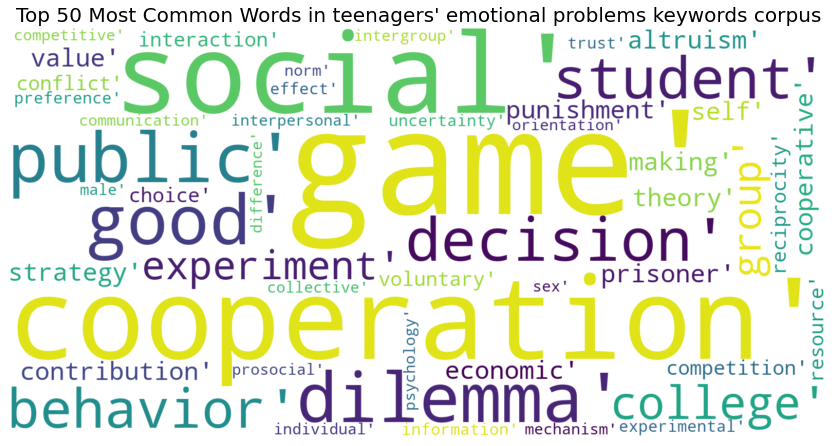

In [14]:
mostcommon = FreqDist(allkeywords).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(18,6), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Most Common Words in teenagers\' emotional problems keywords corpus', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

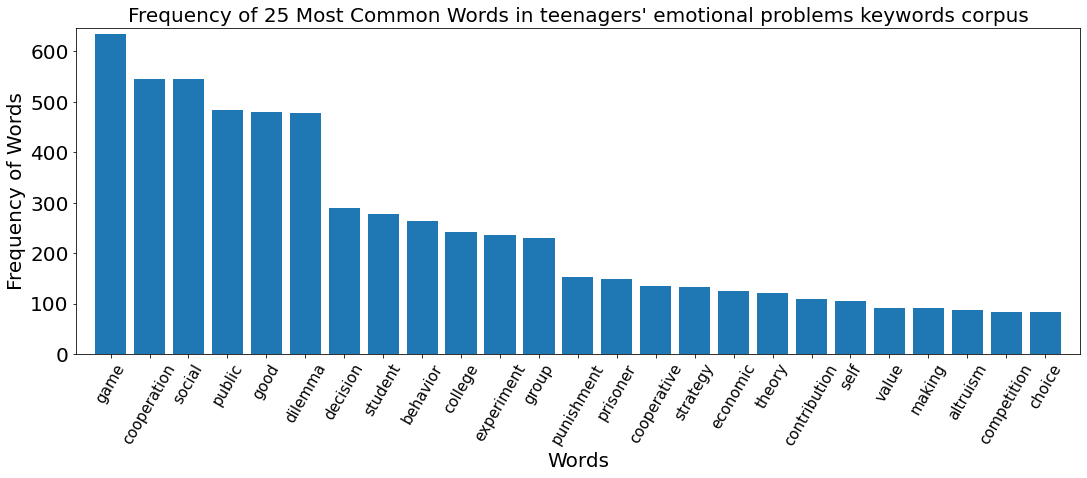

In [15]:
mostcommon_small = FreqDist(allkeywords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(18,6))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=15)
plt.title('Frequency of 25 Most Common Words in teenagers\' emotional problems keywords corpus', fontsize=20)
plt.show()

In [16]:
allabstracts = []
for wordlist in lemmatized_abstracts:
    allabstracts += wordlist

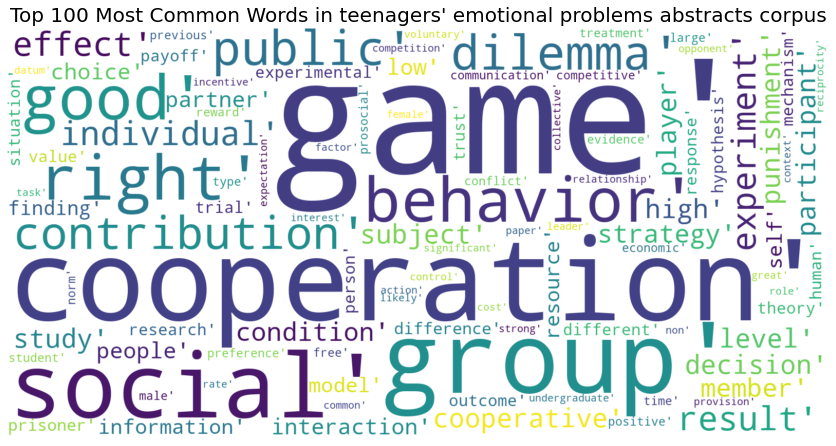

In [17]:
mostcommon = FreqDist(allabstracts).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(18,6), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in teenagers\' emotional problems abstracts corpus', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

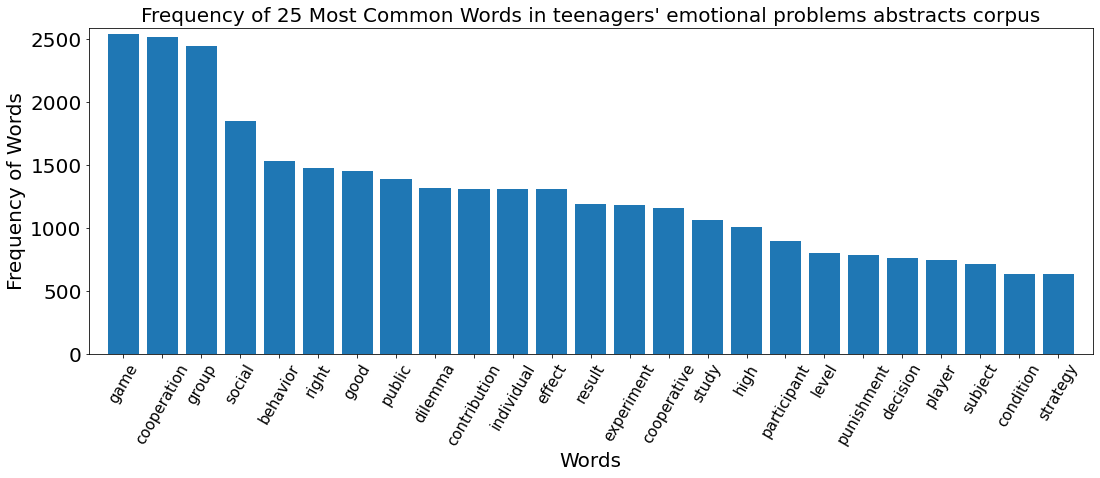

In [18]:
mostcommon_small = FreqDist(allabstracts).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(18,6))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=15)
plt.title('Frequency of 25 Most Common Words in teenagers\' emotional problems abstracts corpus', fontsize=20)
plt.show()

In [19]:
MIN_DF = 5 # setting minimum document frequency -> we keep words which occur at least in 5 documents
MAX_DF = 0.85 # maximum document frequency -> word has to be included in less than 85 percent of document in order to be included

def get_dict_and_corpus(lemmatized_texts, MIN_DF, MAX_DF):
  dictionary = Dictionary(lemmatized_texts) # get the vocabulary
  dictionary.filter_extremes(no_below=MIN_DF, 
                            no_above=MAX_DF) #filtering out of the extreme values 
  corpus = [dictionary.doc2bow(text) for text in lemmatized_texts] #creating corpus
  return dictionary,corpus

In [20]:
keywords_dict, corpus_keywords = get_dict_and_corpus(lemmatized_keywords, MIN_DF, MAX_DF)
abstracts_dict, corpus_abstracts = get_dict_and_corpus(lemmatized_abstracts, MIN_DF, MAX_DF)

In [21]:
print('Number of unique tokens in keywords: %d' % len(keywords_dict))
print('Number of documents in keywords: %d' % len(corpus_keywords)) 

Number of unique tokens in keywords: 434
Number of documents in keywords: 1729


In [22]:
print('Number of unique tokens in abstracts: %d' % len(abstracts_dict))
print('Number of documents in abstracts: %d' % len(corpus_abstracts)) 

Number of unique tokens in abstracts: 1793
Number of documents in abstracts: 2004


## functions for LDA and topic coherence

In [23]:
def get_lda(n_topics, corpus, dictionary):
    """
    Returns the lda model.
    """
    N_TOPICS = n_topics # set number of topics
    N_ITERATIONS = 1000 # parameter to set number of iterations

    lda = LdaModel(corpus,id2word=dictionary, num_topics=N_TOPICS, iterations = 1000, random_state = 43) #train the model
    return lda #return the model

In [24]:
def analyse_topics(N_TOPICS, lda):
    """
    Prints topics

    Parameters
    ----------
    N_TOPICS : int
        number of topics to be found
    lda : instance of LdaMallet
        trained model
        
    Returns
    -------
    """
    for topic in range(N_TOPICS): #for loop to go over all topics
        words = lda.show_topic(topic, 20) #get the words
        topic_n_words = ' '.join([word[0] for word in words]) 
        print('Topic {}: {}'.format(str(topic), topic_n_words)) #printing the topic

In [25]:
def get_coherence(lda, tokenized_text, dictionary):
    """
    Returns the coherence number of the model.
    Resource: https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

    Parameters
    ----------
    lda : int
        number of topics to be found
    tokenized_text : list
        list of lists of tokenized text
    dictionary : Dictionary
        dictionary of tokenized text
    
    Returns
    -------
    int
        coherence value
    """ 
    coherence_model = CoherenceModel(model=lda, texts=tokenized_text, dictionary=dictionary, coherence='c_v') #get coherence model with type of c_v coherence
    return coherence_model.get_coherence() #get coherence and return it 

In [26]:
def create_dict_top2word(N_TOPICS, lda):
  topic2words = {}
  output = []
  for topic in range(N_TOPICS): #for loop to go over all topics
    words = lda.show_topic(topic, 20) #get the words
    topic2words[topic] = [word[0] for word in words[:10]]
    output.append([word[0] for word in words[:10]])

  output_dict = {"topics": output}
  return topic2words, output_dict


In [27]:
def get_diversity(N_TOPICS, lda):
  _, output_dict = create_dict_top2word(N_TOPICS, lda)
  topic_diversity= TopicDiversity(topk=10)

  return topic_diversity.score(output_dict)

In [28]:
MIN_N_TOPICS = 7
MAX_N_TOPICS = 150

def get_topics_and_score(corpus, dictionary, lemmatized_texts):
  score = [] #list to store the score
  labels = [] #list to store the label
  models = [] #lsit to store the model
  diversity = []
  for k in tqdm(range(MIN_N_TOPICS,MAX_N_TOPICS)): 
      lda = get_lda(k, corpus, dictionary) #train the model
      score.append(get_coherence(lda, lemmatized_texts, dictionary)) #add coherence score to the list
      diversity.append(get_diversity(k,lda))
      labels.append(str(k)) #add number of topics to the list
      models.append(lda)#add model to the list

  return score, labels, models, diversity

In [29]:
def visualize_metric(score, diversity, labels, text):
    """
    Returns the figure where coherence and diversity across different number of topics is visualised.

    Parameters
    ----------
    score : list
        list of int scores to be on y axis
    labels : list
        list of strings with labels to be on x axis
    
    Returns
    -------
     figure
    """


    plt.rcParams.update({'figure.figsize':(20,6), 'figure.dpi':70, 'font.size': 10})
    plt.scatter(labels, score, label=f'Topic Coherence')
    plt.scatter(labels, diversity, label=f'Topic Diversity')
    plt.xticks(np.arange(MIN_N_TOPICS, MAX_N_TOPICS, step=5))

    plt.title(f'Coherence and diversity scores plot {text}' )
    plt.xlabel("Topic")
    plt.ylabel('Score') 
    plt.legend()
    plt.show()

    return plt #return plt

## run the models and print the topic

In [30]:
score_keywords, labels_keywords, models_keywords, diversity_keywords = get_topics_and_score(corpus_keywords, keywords_dict, lemmatized_keywords)

  0%|          | 0/143 [00:00<?, ?it/s]

In [31]:
score_abstracts, labels_abstracts, models_abstracts, diversity_abstracts = get_topics_and_score(corpus_abstracts, abstracts_dict, lemmatized_abstracts)

  0%|          | 0/143 [00:00<?, ?it/s]

## visualise coherence and diversity

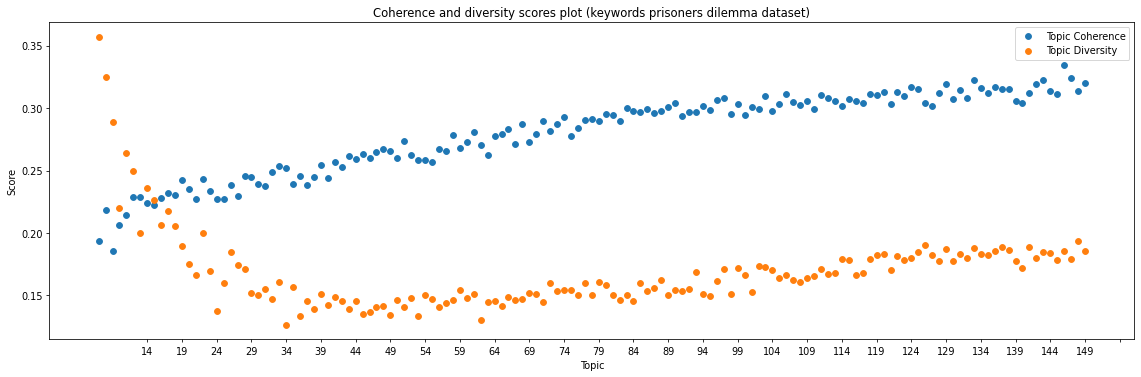

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [32]:
visualize_metric(score_keywords, diversity_keywords, labels_keywords, '(keywords prisoners dilemma dataset)')

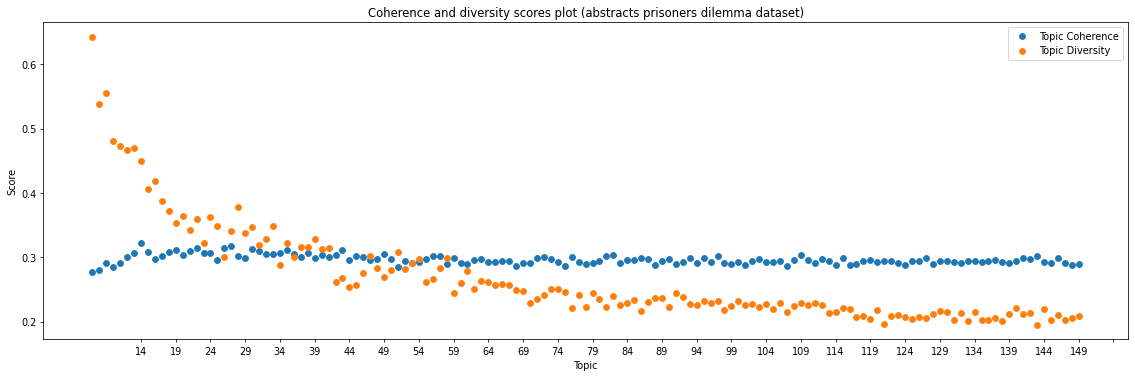

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [33]:
visualize_metric(score_abstracts, diversity_abstracts, labels_abstracts, '(abstracts prisoners dilemma dataset)')


## functions for network

In [34]:
# create df with nodes and edges
def generate_edges(topic2words):
  word2topics = {}
  for key ,values in topic2words.items():
    for value in values:
      if value in word2topics:
        word2topics[value].append(key)
      else:
        word2topics[value] = [key]

  source = []
  target = []
  for topic, words in topic2words.items():
    for word in words:
      for top in word2topics[word]:
        if top != topic:
          source.append(f"{words[0]}\n{words[1]}")
          target_words = topic2words[top]
          target.append(f"{target_words[0]}\n{target_words[1]}")


  df = pd.DataFrame()
  df['source'] = source
  df['target'] = target
  df['weight'] = 1

  return df

In [35]:
def df2network(edges_df):
  network = nx.from_pandas_edgelist(edges_df, source = 'source', target = 'target', edge_attr = 'weight',create_using=nx.MultiGraph())
  return network

## topic coherence, topic diversity and network for keywords

In [36]:
topic_quality_keywords = np.multiply(score_keywords, diversity_keywords)


In [39]:
max_topic_keywords = max(topic_quality_keywords)
print(f'max topic quality for keywords: {max_topic_keywords}')

max_topic_index_key = np.argmax(topic_quality_keywords)
max_topic_key = max_topic_index_key + MIN_N_TOPICS
print(f'number of topics: {max_topic_key}')

max_key_model = models_keywords[max_topic_index_key]

max topic quality for keywords: 0.070905883820975
number of topics: 8


In [41]:
print(f'topic coherence keywords : {score_keywords[max_topic_index_key]}')
print(f'topic diversity keywords : {diversity_keywords[max_topic_index_key]}')

topic coherence keywords : 0.21817195021838462
topic diversity keywords : 0.325


In [42]:
print("------Print the topics of the best model:")
analyse_topics(max_topic_key, max_key_model) #print the topics found
print("------")

------Print the topics of the best model:
Topic 0: punishment social public good group competition game dilemma cooperation experiment behavior decision trust collective making interaction student effect orientation environmental
Topic 1: social cooperation decision theory dilemma game experiment voluntary preference contribution public risk interpersonal strategy good behavior making group economic goal
Topic 2: cooperation game behavior social good public dilemma economic experiment self student decision college strategy experimental prisoner choice theory sex difference
Topic 3: game student college behavior cooperation cooperative interaction public dilemma group good resource uncertainty social communication perception strategy conflict male economic
Topic 4: decision social game cooperation strategy dilemma behavior student college altruism public good cooperative self group making punishment prisoner competitive experiment
Topic 5: dilemma social cooperation game decision prison

In [43]:
dict_keywords,_ = create_dict_top2word(max_topic_key, max_key_model)
keywords_edges = generate_edges(dict_keywords)
keywords_edges.to_csv("LDA_keywords_emotions_network.csv")

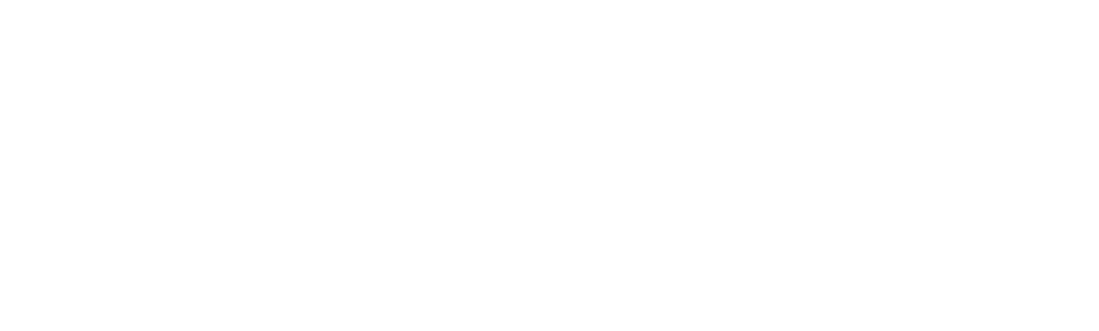

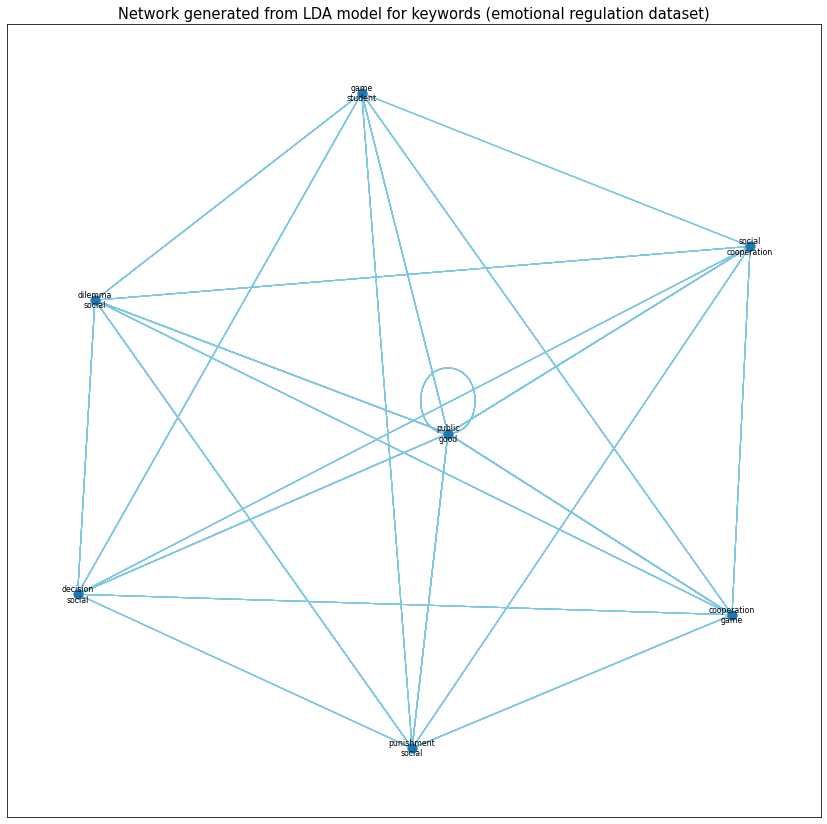

In [44]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from LDA model for keywords (emotional regulation dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(keywords_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)
                 

In [45]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(keywords_edges))

net.show("LDA_net_keywords_emotions.html")

## topic coherence, topic diversity and network for abstracts




In [46]:
topic_quality_abstracts = np.multiply(score_abstracts, diversity_abstracts)


In [48]:

max_topic_abstracts = max(topic_quality_abstracts)
print(f'max topic quality for keywords {max_topic_abstracts}')

max_topic_index_abs = np.argmax(max_topic_abstracts)
max_topic_abs = max_topic_index_abs + MIN_N_TOPICS
print(f'number of topics for abs: {max_topic_abs}')

max_abs_model = models_abstracts[max_topic_index_abs]

max topic quality for keywords 0.17870163480659565
number of topics for abs: 7


In [49]:
print(f'topic coherence keywords : {score_abstracts[max_topic_index_abs]}')
print(f'topic diversity keywords : {diversity_abstracts[max_topic_index_abs]}')

topic coherence keywords : 0.27798032081025986
topic diversity keywords : 0.6428571428571429


In [50]:
print("------Print the topics of the best model:")
analyse_topics(max_topic_key, max_key_model) #print the topics found
print("------")

------Print the topics of the best model:
Topic 0: punishment social public good group competition game dilemma cooperation experiment behavior decision trust collective making interaction student effect orientation environmental
Topic 1: social cooperation decision theory dilemma game experiment voluntary preference contribution public risk interpersonal strategy good behavior making group economic goal
Topic 2: cooperation game behavior social good public dilemma economic experiment self student decision college strategy experimental prisoner choice theory sex difference
Topic 3: game student college behavior cooperation cooperative interaction public dilemma group good resource uncertainty social communication perception strategy conflict male economic
Topic 4: decision social game cooperation strategy dilemma behavior student college altruism public good cooperative self group making punishment prisoner competitive experiment
Topic 5: dilemma social cooperation game decision prison

In [51]:
dict_abstracts,_ = create_dict_top2word(max_topic_abs, max_abs_model)

abstracts_edges = generate_edges(dict_abstracts)
abstracts_edges.to_csv("LDA_abstracts_emotions_network_df.csv")

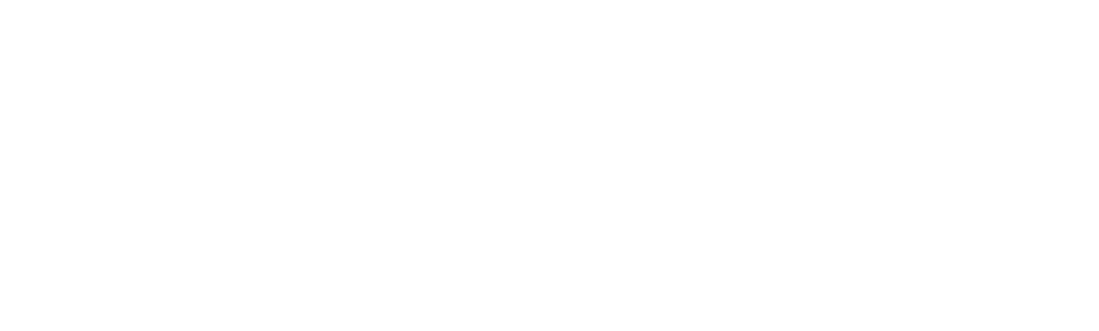

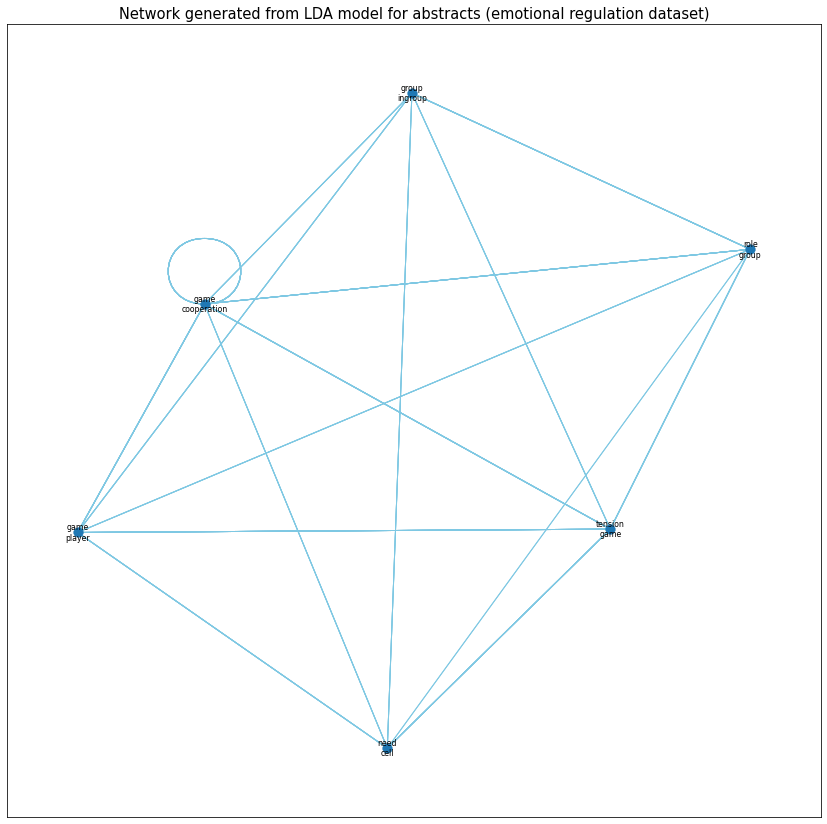

In [52]:
# create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from LDA model for abstracts (emotional regulation dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(abstracts_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)

In [53]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(abstracts_edges))

net.show("LDA_net_abstracts_emotions_regulation.html")